# EXPLORATION DATA ANALYSIS

- We will explore more in data and visualization the data to get better idea how our data
- First we need creating all the function and plot data.
- Summary from what we found and our plot are showing

# Import library and all file we need

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact, widgets

In [40]:
#Loading data
data1 = pd.read_csv('data/question1_data.csv').drop('Unnamed: 0', axis = 1)
data2 = pd.read_csv('data/question2_data.csv')
data3 = pd.read_csv('data/question3_data.csv')
data_item_name = pd.read_csv('data/items.csv')
test = pd.read_csv('data/test.csv', index_col= 'ID')

In [41]:
data_item_name.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [42]:
data1['total_price'] = data1.item_price * data1.item_cnt_day
data1 = pd.merge(data1, data_item_name, how='left')
data1.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,total_price,item_name,item_category_id
0,0,0,32,221.0,6.0,1326.0,1+1,40
1,0,0,33,347.0,3.0,1041.0,1+1 (BD),37
2,0,0,35,247.0,1.0,247.0,10 ЛЕТ СПУСТЯ,40
3,0,0,43,221.0,1.0,221.0,100 МИЛЛИОНОВ ЕВРО,40
4,0,0,51,127.0,1.0,127.0,100 лучших произведений классики (mp3-CD) (Dig...,57


# Creating the Function and Code

*FOR OVERSEEKING WHOLE DATA FOR EACH MONTH and ALL SHOP TOGETHER*

In [43]:
#Plot the total month sale for all shop
def plot(shop_id_sub):
    for i in shop_id_sub:
        data = data1_new[data1_new.shop_id == i]
        x = np.arange(0,len(data.date_block_num))
        y = data.item_cnt_day
        _ = plt.plot(x,y)
        _ = plt.xlabel('month')
        _ = plt.ylabel('item sale')
        _ = plt.title('Total Sale by Month of Shop_ID: ' + str(i-9) + ' to ' +str(i))
        _ = plt.legend(shop_id_sub)
        _ = plt.xticks(np.arange(0, 34, step=1))
    

In [44]:
#Plot total sale for each month for all shop
def all_shop_month_sale():
    question1_view_month = data1[['date_block_num','item_cnt_day']]
    x1 = question1_view_month.groupby('date_block_num').sum()
    quantile = np.percentile(x1, [25,50,75])
    temp_dict = {}
    temp_dict['min'] = [np.min(x1.item_cnt_day)]
    temp_dict['25% quantile'] = [quantile[0]]
    temp_dict['50% quantile'] = [quantile[1]]
    temp_dict['mean'] = [np.mean(x1.item_cnt_day)]
    temp_dict['75% quantile'] = [quantile[2]]
    temp_dict['max'] = [np.max(x1.item_cnt_day)]
    new_df = pd.DataFrame.from_dict(temp_dict)
    
    _ = plt.figure(figsize = (20,5))
    _ = plt.plot(x1)
    _ = plt.xticks(np.arange(0,34, step = 1))
    _ = plt.xlabel('Month')
    _ = plt.ylabel('Total sale each month')
    _ = plt.title('Forecasting the Total sale of each month')
    
    return new_df

In [45]:
#Plot total sale for each shop
def total_sale_shop():
    question1_view_shop = data1[['shop_id','item_cnt_day']]
    x2 = question1_view_shop.groupby('shop_id').sum()
    _ = plt.figure(figsize = (20,5))
    _ = plt.plot(x2, marker = 'v')
    _ = plt.xticks(np.arange(0,60, step = 1))
    _ = plt.axhline(np.mean(x2.item_cnt_day), color = 'r')
    _ = plt.xlabel('Shop_id')
    _ = plt.ylabel('Total sale each shop')
    _ = plt.title('Forecasting the Total sale of each shop')
    _ = plt.legend(['total sale', 'Mean of all shop'])

In [46]:
#Plot total sale for each item
def total_sale_item(default = 1000000):
    question1_view_item = data1[['item_id','item_cnt_day']]
    x3 = question1_view_item.groupby('item_id').sum()
    x3 = x3[x3.item_cnt_day < default] # have 1 item them was way larger, so we just remove it to get better looking graph
    _ = plt.figure(figsize = (20,5))
    _ = plt.plot(x3, marker = 'v')
    #_ = plt.xticks(np.arange(0,60, step = 1))
    _ = plt.axhline(np.mean(x3.item_cnt_day), color = 'r')
    _ = plt.xlabel('Item_id')
    _ = plt.ylabel('Total sale each item')
    _ = plt.title('Forecasting the Total sale of each item')
    _ = plt.legend(['total sale'])
    return 'Mean: ' + str(np.mean(x3.item_cnt_day))

#Plot top 10 items were sold of store
def top10_item_sale_all_shop(default = 10000000):
        question1_view_item = data1[['item_id','item_cnt_day', 'item_name','total_price']]
        x3 = question1_view_item.groupby(['item_id','item_name']).sum()
        x3 = x3[x3.item_cnt_day < default] # have 1 item them was way larger, so we just remove it to get better looking graph
        x4 = x3.sort_values(by ='item_cnt_day', ascending = False )
        x4_1 = x4[0:10]
        _ = plt.figure(figsize = (20,5))
        _ = sns.barplot(x = x4_1.index.get_level_values(0), y = x4_1.item_cnt_day, color = 'Blue', order= x4_1.index.get_level_values(0))
        _ = plt.title('TOP 10 ITEM TOTAL SALE')      
        return x4_1

In [47]:
#Plot how much store are sold each month
def Total_money_sale_for_each_month():
    question1_view_sale = data1[['date_block_num', 'total_price']]
    x5 = question1_view_sale.groupby('date_block_num').sum() 
    x6 = x5.sort_values(by ='total_price', ascending = False)
    _ = plt.figure(figsize = (20,5))
    _ = sns.barplot(x = x6.index, y = x6.total_price, order= x6.index, color = 'Blue')
    _ = plt.xlabel('Month')
    _ = plt.ylabel('Total sale each month')
    _ = plt.title('TOP 10 Total $$$ sale of each month')

In [48]:
#Plot total each item sold, for each shop... we use iteractive to create bar slide and show graph
def plot_shop_item_sale(shop_id):
    data = data1[data1.shop_id == shop_id]
    group_item = data[['item_id','item_cnt_day']].groupby('item_id').sum()
    #max_item.append(max(group_item.item_cnt_day))
    _ = plt.figure(figsize = (20,5))
    _ = plt.plot(group_item, marker = '.', linestyle = '')
    return group_item[group_item.item_cnt_day == max(group_item.item_cnt_day)]

In [49]:
#Get top 5 items were each of each shop. Also use iteractive to create bar slide
def top5_item_sale(shop_id): 
    data = data1[data1.shop_id == shop_id]
    group_item = data[['item_id','item_cnt_day','item_name','item_price']].groupby(['item_name','item_price','item_id'], as_index =False).sum()
    sort_group_item = group_item.sort_values(by = 'item_cnt_day',ascending = False)
    y = sort_group_item[0:5]
    _ = plt.figure(figsize = (15,5))
    ax = sns.barplot(x ='item_name', y = 'item_cnt_day', data = y, color ='Blue')
    ax.set_xticklabels(y.item_id)
    _ = plt.title('TOP 5 ITEM SALE FOR SHOP_ID: ' + str(shop_id))
   # _ = plt.xticks(sort_group_item.index['item_id'])
    return y

In [50]:
#Plot group of range price and total sale
item_price_and_item_cnt = data1.loc[:,['item_cnt_day','item_price']]
def group_price_together(dl):
    if dl < 100:
        return '$0 <= Price < $100'
    elif dl< 200:
        return '$100 <= Price < $200 '
    elif dl < 300: 
        return '$200 <= Price < $300'
    elif dl< 400:
        return '$300 <= Price < $400'
    elif dl < 500: 
        return '$400 <= Price < $500'
    elif dl < 600:
        return '$500 <= Price < $600'
    elif dl< 700:
        return '$600 <= Price < $700'
    elif dl < 800: 
        return '$700 <= Price < $800'
    elif dl < 900:
        return '$800 <= Price < $900'
    elif dl< 1000:
        return '$900 <= Price < $1000'
    elif dl< 2000:
        return '$1000 <= Price < $2000'
    else:
        return 'Greater than 2000'
def group_item_price_plot():
    item_price_and_item_cnt['Group_item_price']= item_price_and_item_cnt.item_price.map(group_price_together)
    item_group_month = item_price_and_item_cnt.groupby(['Group_item_price'], as_index = True).sum().drop(['item_price'],axis = 1)
    _ = plt.figure(figsize = (15,5))
    _ = sns.barplot(x = item_group_month.index, y = item_group_month.item_cnt_day, color = 'Blue')
    _ = plt.xticks(rotation=90)

# Ready for Visualization the data

In [51]:
#Plot the total month sale for all shop

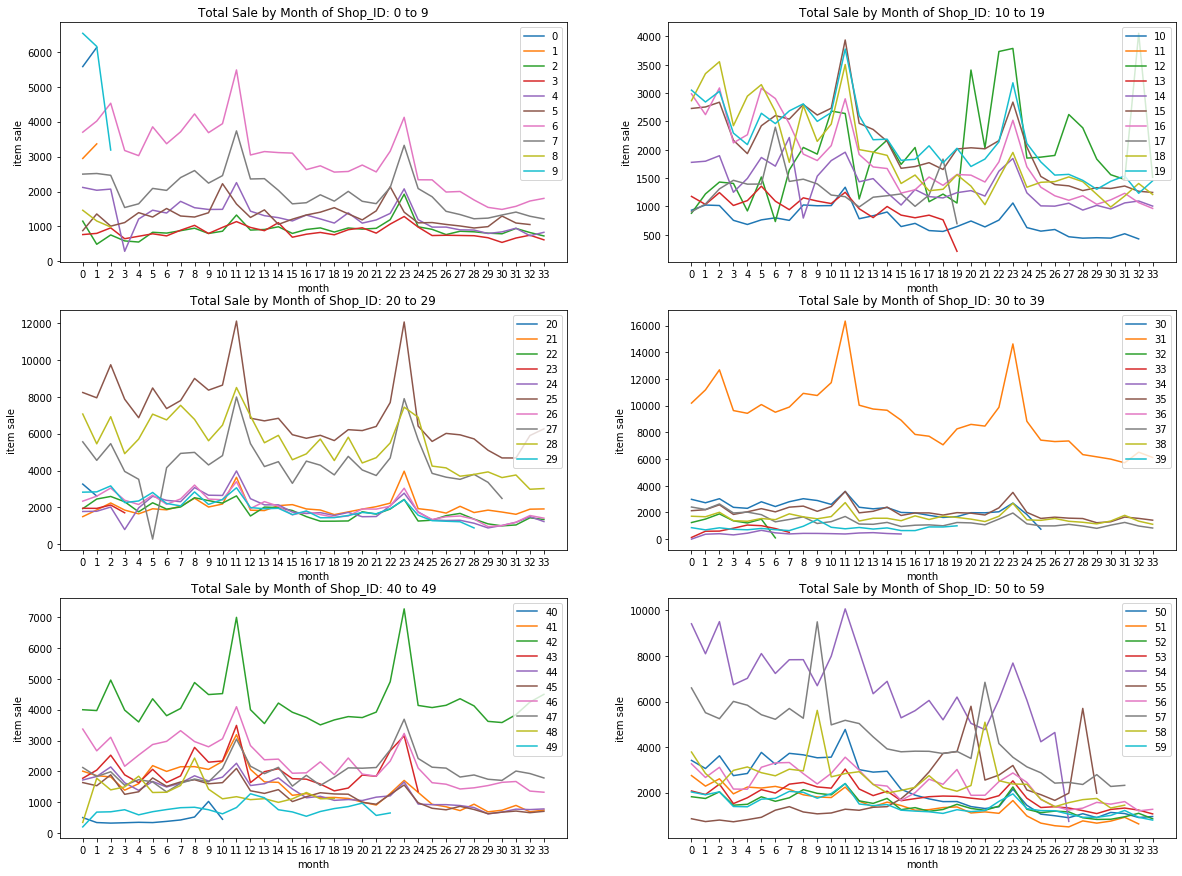

In [52]:
data1_new = data1.groupby(['shop_id','date_block_num'], as_index = False).sum()
data_block_num = set(data1.date_block_num)
shop_id = list(set(data1.shop_id))
_ = plt.figure(figsize=(20,15))
_ = plt.subplot(3,2,1)
plot(shop_id[0:10])
_ = plt.subplot(3,2,2)
plot(shop_id[10:20])
_ = plt.subplot(3,2,3)
plot(shop_id[20:30])
_ = plt.subplot(3,2,4)
plot(shop_id[30:40])
_ = plt.subplot(3,2,5)
plot(shop_id[40:50])
_ = plt.subplot(3,2,6)
plot(shop_id[50:])

- Looking at the graph, so can tell that will have more item sale on november
- And some store have missing month. Either they forget put in or the store wasn't sale anything on that month
- Some store is have more sale than another

,min,25% quantile,50% quantile,mean,75% quantile,max
0,63316.0,86190.5,107293.0,107023.5,125535.25,183415.0


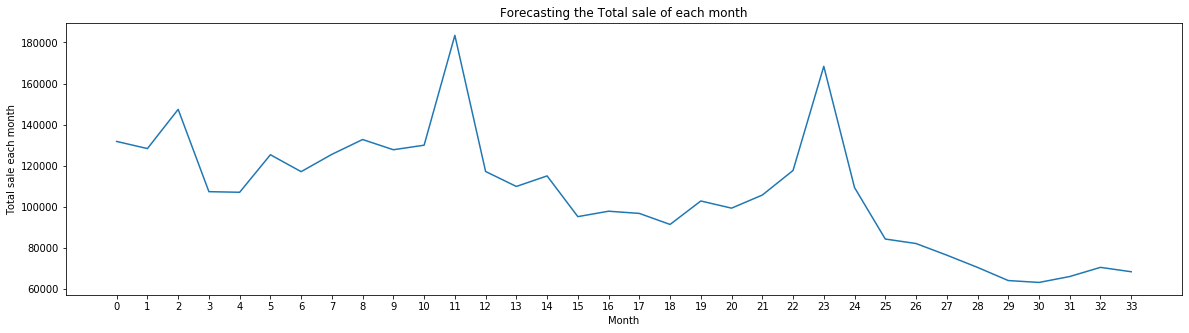

In [53]:
#Total sale of each month
all_shop_month_sale()

- The graph can show you that more item was sold in November.
- Then the decreasing from December and Janurary.
- Also you can see that data was descresing from left to right, it mean our sold are decreasing.

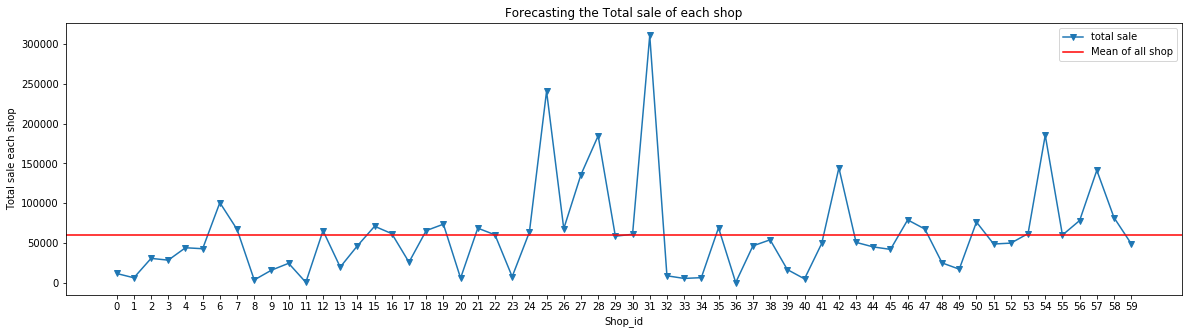

In [54]:
#Plot total sale for each shop
total_sale_shop()

- Shop 31 have most selling item, and it was way alot to compare with most store
- It was about 50% of the shop total sold at average or above

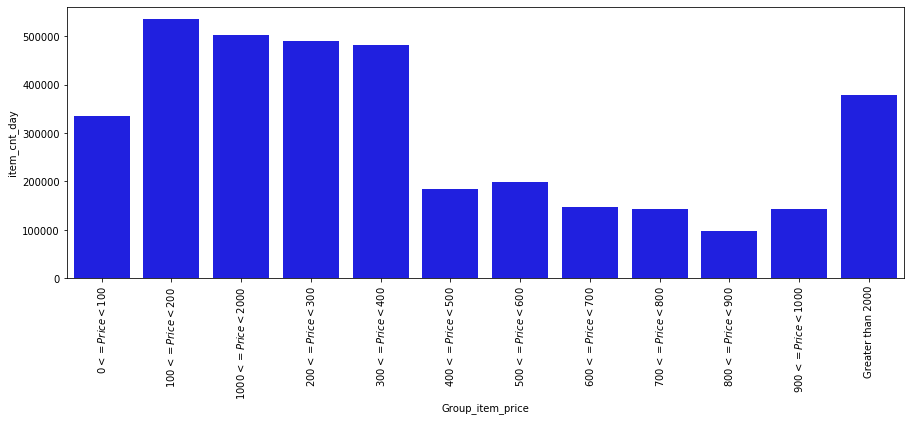

In [55]:
#Plot group the price range and see how much selling that range price
group_item_price_plot()

- As we expected, that item have less price will have more sale
- Most item was sell 1 per

'Mean: 166.88676389653276'

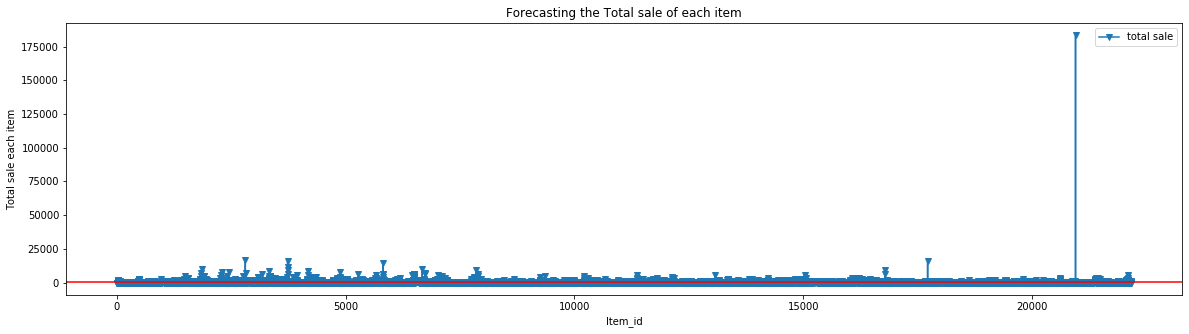

In [56]:
#For for total sale of each item for all shop
total_sale_item()

- The plot show have 1 item more was higher than other, so that make our plot not good visualization
- Now let remove that item and see back our plot again


'Mean: 158.49153786176214'

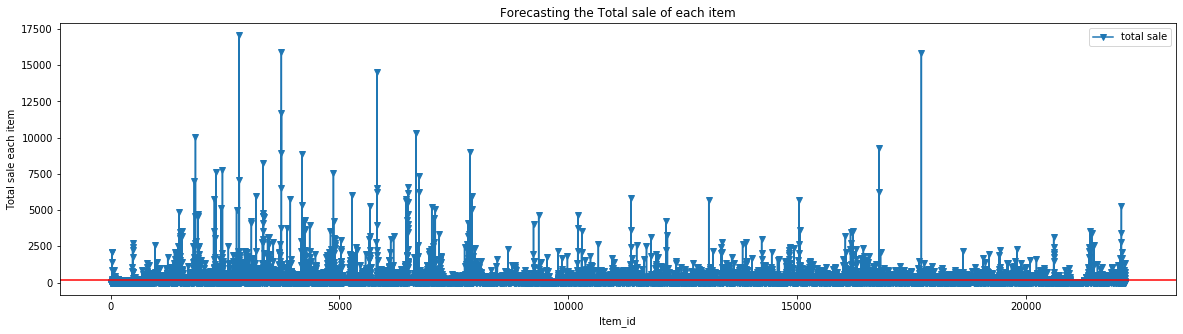

In [57]:
total_sale_item(175000)

- Looking the graph, you can tell that some item was sale alot more than another
- The avergae sale of each item is 166.8. As you see in the red line on the graph.

,,item_cnt_day,total_price
item_id,item_name,,
20949,Фирменный пакет майка 1С Интерес белый (34*42) 45 мкм,183208.0,9.087687e+05
2808,"Diablo III [PC, Jewel, русская версия]",17055.0,1.666347e+07
3732,"Grand Theft Auto V [PS3, русские субтитры]",15907.0,4.175331e+07
17717,Прием денежных средств для 1С-Онлайн,15830.0,1.720083e+07
5822,Playstation Store пополнение бумажника: Карта оплаты 1000 руб.,14522.0,1.541673e+07
3734,"Grand Theft Auto V [Xbox 360, русские субтитры]",11733.0,3.118972e+07
6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1108A/B01),10315.0,2.199861e+08
1855,"Battlefield 4 [PC, русская версия]",10041.0,9.365399e+06
16787,"Одни из нас [PS3, русская версия]",9255.0,2.197261e+07


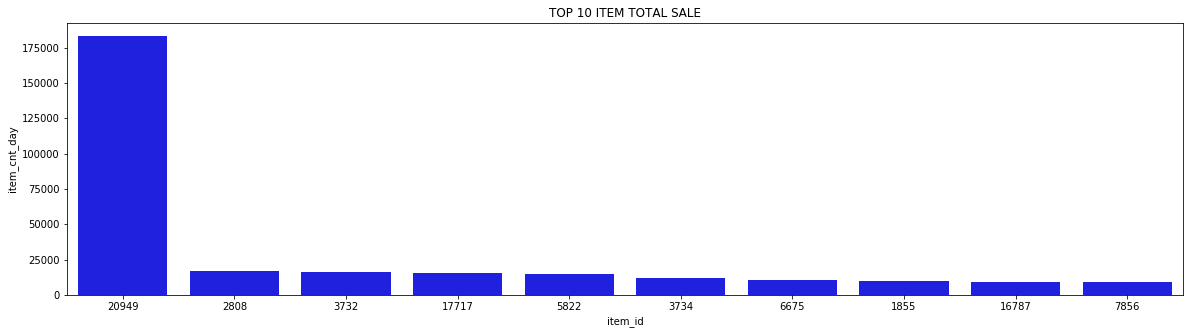

In [58]:
top10_item_sale_all_shop()

- The top 10 of the item sell you can notice that:
    - Item 20949 was item have a lot total sold than other items.
    - By the google translate, it was plastic bag. So we doesnt know is it plastic bag of store used or the plastic of bag sell. We can point out this question to customer, so we can make the data more visualization. 
    - And the total price sell of item 20949 was more less than the another top 10 sell

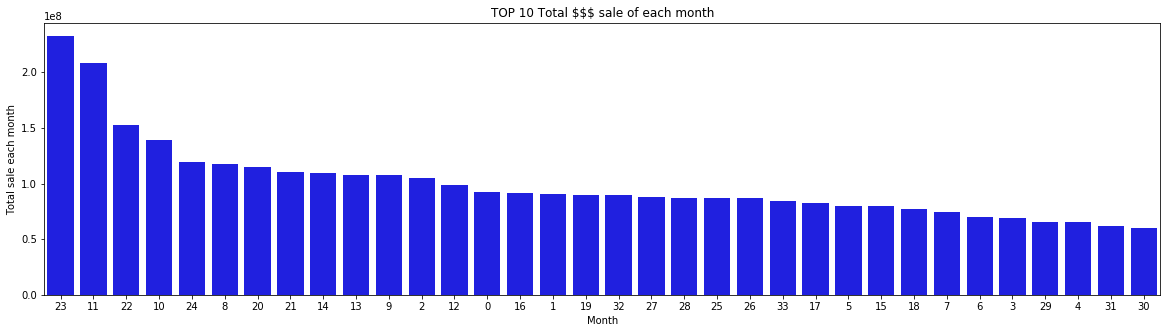

In [59]:
#Top 10 Month with most sale
Total_money_sale_for_each_month()

- yes again, we can see that November was have profit than another month

- Now we get in more see detail od each shop was sold. you can easy to checking shop you want to see

In [60]:
#Total item sale of each shop
interact(plot_shop_item_sale,shop_id=widgets.IntSlider(min=0,max=59,step=1,value=
0))

interactive(children=(IntSlider(value=0, description='shop_id', max=59), Output()), _dom_classes=('widget-inte…

<function __main__.plot_shop_item_sale(shop_id)>

In [61]:
#Top 5 item sale of each shop
interact(top5_item_sale,shop_id=widgets.IntSlider(min=0,max=59,step=1,value=0))
    

interactive(children=(IntSlider(value=0, description='shop_id', max=59), Output()), _dom_classes=('widget-inte…

<function __main__.top5_item_sale(shop_id)>

# Conlusion



- The peak sell for the year is November.
- The total sold are decreasing.
- About 50% of shop is sell equal or above the average of all shop sold.
- The most frquency for sell 1 item per day is a lot.
- The less price, tend to have more sold.
- The most item sold was under $400
- We need consider item 20949, plastic bag, have the most sale of the item. So it bring our mean and total sell way lot high.
- For now, we are just all assumming the item 20949 was good, so everything we will include them.